# Usando dados a ordem 1, 0, 4 e 5

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from data.df_io import read, get_feat_lables
from data.df_prep import get_onexall_split, get_specific_split
from ai_models.PLA import PLA
from metrics.metrics import compute_acc, confusion, eficiency_report
from visualization.models_plots import show_model_line, show_mult_model_lines


train_path = Path("../digits/db/train_redu.csv")
test_path = Path("../digits/db/test_redu.csv")

In [2]:
df_train = read(train_path, sep=",")
df_test = read(test_path, sep=",")

In [3]:
X_train, Y_train = get_feat_lables(df_train)
X_test, Y_test = get_feat_lables(df_test)

# 1xAll

## Get 1xALL dataset

In [4]:
X_train_1xAll, Y_train_1xAll = get_onexall_split(X_train, Y_train, 1)
X_test_1xAll, Y_test_1xAll = get_onexall_split(X_test, Y_test, 1)

In [5]:
base_column = np.ones((X_train_1xAll.shape[0], 1))

In [6]:
X_train_1xAll = np.hstack((base_column, X_train_1xAll))

In [7]:
base_column = np.ones((X_test_1xAll.shape[0], 1))
X_test_1xAll = np.hstack((base_column, X_test_1xAll))

## Train and test 1xAll logistic regression

In [8]:
model4one = PLA()
it, w4one, W  = model4one.fit(X_train_1xAll, Y_train_1xAll, epochs=20000)

### Ein eval

In [9]:
Y_pred = model4one.predict(X_train_1xAll, w4one)
compute_acc(Y_train_1xAll, Y_pred)

0.3458371454711802

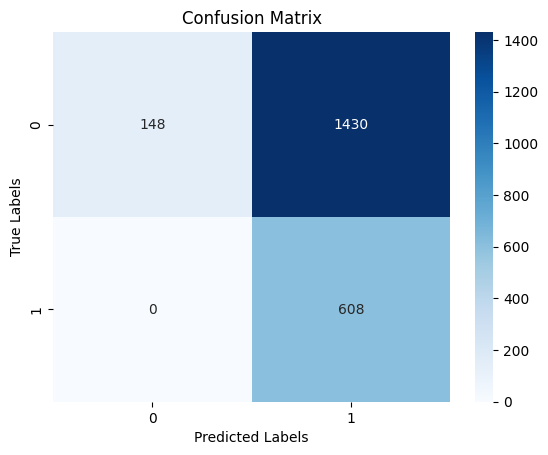

In [10]:
confusion(Y_train_1xAll, Y_pred, 0, 1)

### Eout eval

In [11]:
Y_pred = model4one.predict(X_test_1xAll, w4one)
compute_acc(Y_test_1xAll, Y_pred)

0.3255605381165919

In [12]:
eficiency_report(Y_test_1xAll, Y_pred)

{'acc': 0.3255605381165919,
 'precision': np.float64(0.2796934865900383),
 'recall': np.float64(1.0),
 'f1': np.float64(0.437125748502994)}

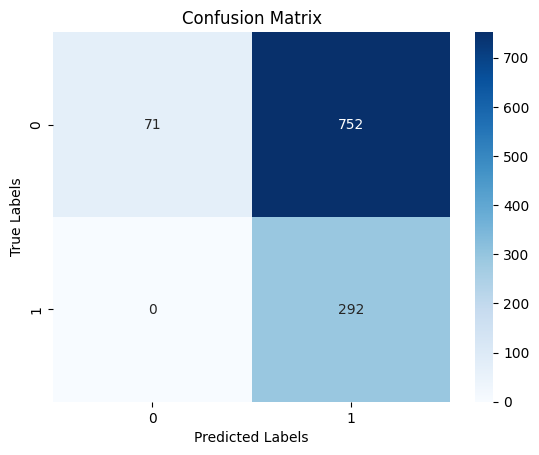

In [13]:
confusion(Y_test_1xAll, Y_pred, 0, 1)

### Model plot

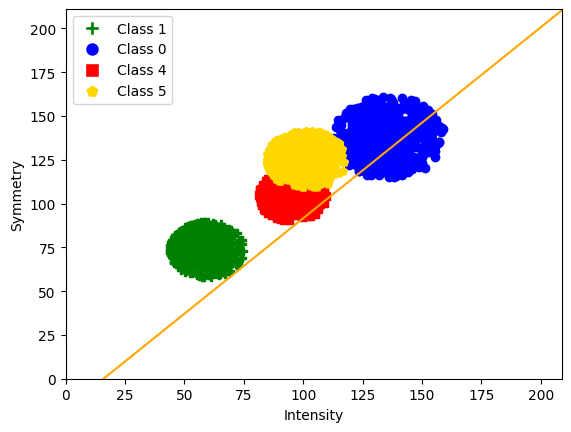

In [14]:
X_train_plot, Y_train_plot = get_onexall_split(X_train, Y_train, 1, False)
X_test_plot, Y_test_plot = get_onexall_split(X_test, Y_test, 1, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4one,
    1,
    0,
    4,
    5,
)

# 0xAll (except 1)

## Get 0xAll (except 1) dataset

In [15]:
X_train4zero, Y_train4zero = get_feat_lables(df_train[df_train.label != 1])
X_test4zero, Y_test4zero = get_feat_lables(df_test[df_test.label != 1])

In [16]:
X_train_0xAll, Y_train_0xAll = get_onexall_split(X_train4zero, Y_train4zero, 0)
X_test_0xAll, Y_test_0xAll = get_onexall_split(X_test4zero, Y_test4zero, 0)

In [17]:
base_column = np.ones((X_train_0xAll.shape[0], 1))

In [18]:
X_train_0xAll = np.hstack((base_column, X_train_0xAll))

In [19]:
base_column = np.ones((X_test_0xAll.shape[0], 1))
X_test_0xAll = np.hstack((base_column, X_test_0xAll))

## Train and test 0xAll logistic regression

In [20]:
model4zero = PLA()
it, w4zero, W = model4zero.fit(X_train_0xAll, Y_train_0xAll, epochs=20000)

### Ein eval

In [21]:
Y_pred = model4zero.predict(X_train_0xAll, w4zero)
compute_acc(Y_train_0xAll, Y_pred)

0.8111533586818758

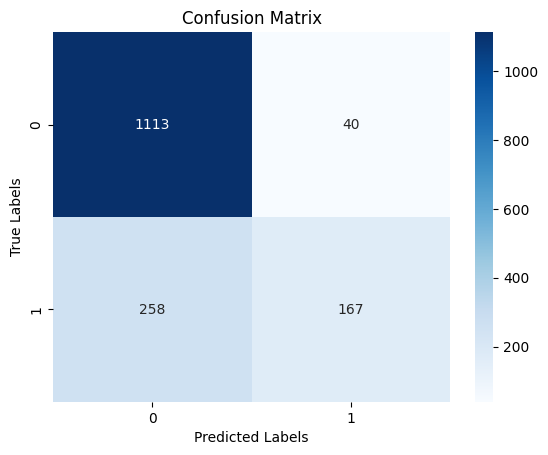

In [22]:
confusion(Y_train_0xAll, Y_pred, 0, 1)

### Eout eval

In [23]:
Y_pred = model4zero.predict(X_test_0xAll, w4zero)
compute_acc(Y_test_0xAll, Y_pred)

0.8007290400972054

In [24]:
eficiency_report(Y_test_0xAll, Y_pred)

{'acc': 0.8007290400972054,
 'precision': np.float64(0.77),
 'recall': np.float64(0.3532110091743119),
 'f1': np.float64(0.48427672955974843)}

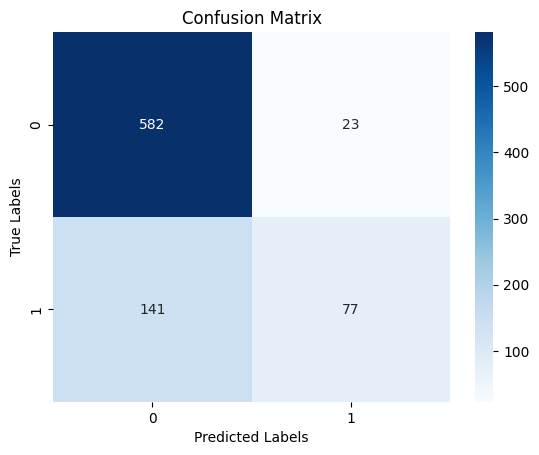

In [25]:
confusion(Y_test_0xAll, Y_pred, 0, 1)

### Model plot

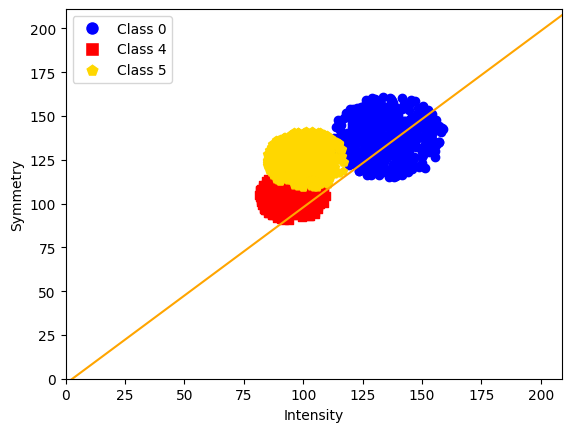

In [26]:
X_train_plot, Y_train_plot = get_onexall_split(X_train4zero, Y_train4zero, 0, False)
X_test_plot, Y_test_plot = get_onexall_split(X_test4zero, Y_test4zero, 0, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4zero,
    0,
    4,
    5,
    None
)

# 4x5

## Get 4x5 dataset

In [27]:
X_train_4x5, Y_train_4x5 = get_specific_split(X_train, Y_train, 4, 5)
X_test_4x5, Y_test_4x5 = get_specific_split(X_test, Y_test, 4, 5)

In [28]:
base_column = np.ones((X_train_4x5.shape[0], 1))

In [29]:
X_train_4x5 = np.hstack((base_column, X_train_4x5))

In [30]:
base_column = np.ones((X_test_4x5.shape[0], 1))
X_test_4x5 = np.hstack((base_column, X_test_4x5))

## Train and test 4x5 logistic regression

In [31]:
model4four = PLA()
it, w4four, W = model4four.fit(X_train_4x5, Y_train_4x5, epochs=20000)

### Ein eval

In [32]:
Y_pred = model4four.predict(X_train_4x5, w4four)
compute_acc(Y_train_4x5, Y_pred)

0.7007805724197745

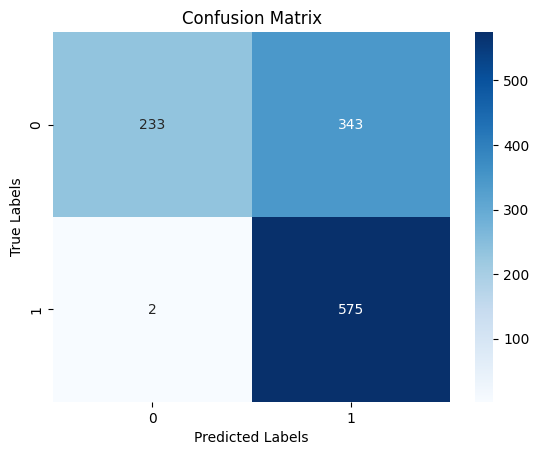

In [33]:
confusion(Y_train_4x5, Y_pred, 0, 1)

### Eout eval

In [34]:
Y_pred = model4four.predict(X_test_4x5, w4four)
compute_acc(Y_test_4x5, Y_pred)

0.7173553719008264

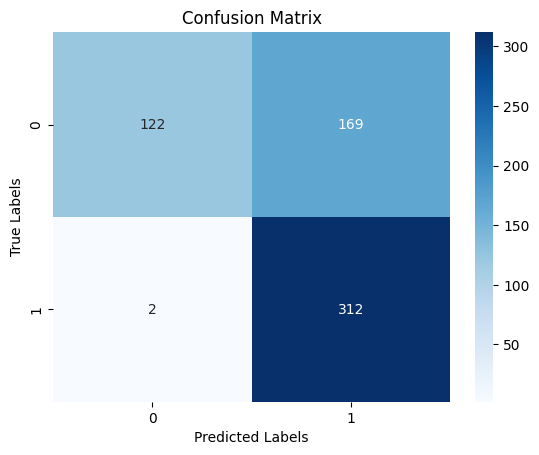

In [35]:
confusion(Y_test_4x5, Y_pred, 0, 1)

In [36]:
eficiency_report(Y_test_4x5, Y_pred)

{'acc': 0.7173553719008264,
 'precision': np.float64(0.6486486486486487),
 'recall': np.float64(0.9936305732484076),
 'f1': np.float64(0.7849056603773585)}

### Model plot

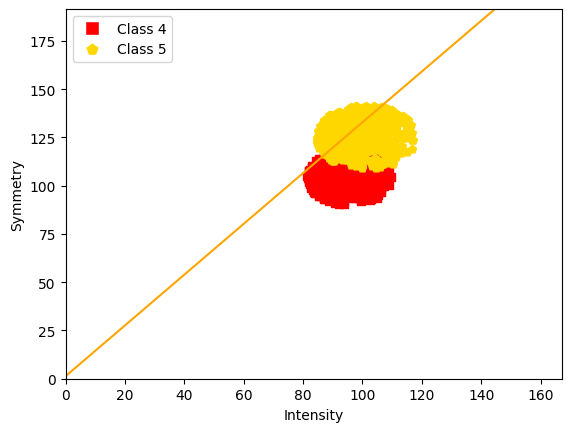

In [37]:
X_train_plot, Y_train_plot = get_specific_split(X_train, Y_train, 4, 5, False)
X_test_plot, Y_test_plot = get_specific_split(X_test, Y_test, 4, 5, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4four,
    4,
    5,
    None,
    None,
)

# Final prediction

In [38]:
X_test = X_test.drop("Unnamed: 0", axis=1)
X_test.head()

,intensity,symmetry
0,147.93,130.471765
1,131.05,122.725490
2,134.89,151.727647
3,139.98,133.918824
4,129.58,130.272745


In [39]:
np.hstack((1, X_test.iloc[0].to_numpy()))

array([  1.        , 147.93      , 130.47176471])

In [40]:
Y_test.head()

,label
0,0
1,0
2,0
3,0
4,0


In [41]:
Y_pred = []
c1 = 0
c4 = 0
c0 = 0
c5 = 0
for i in range(len(X_test)):
    # for model in [w4one, w4zero, w4four]:
    # for model in [model4one, model4zero, model4four]:
    
    if model4one.predict(np.hstack((1, X_test.iloc[i].to_numpy())), w4one, single=True) == 1:
        Y_pred.append(1)
        c1+=1
    elif model4zero.predict(np.hstack((1, X_test.iloc[i].to_numpy())), w4zero, single=True) == 1:
        Y_pred.append(0)
        c0+=1
    elif model4four.predict(np.hstack((1, X_test.iloc[i].to_numpy())), w4one, single=True) == 1:
        Y_pred.append(4)
        c4+=1
    else:
        Y_pred.append(5)
        c5+=1
    

In [42]:
print(c1, c0, c4, c5)

1044 71 0 0


In [43]:
compute_acc(Y_pred, Y_test.to_numpy())

0.32107623318385653

In [44]:
eficiency_report(Y_pred, Y_test.to_numpy(), avarage=None)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'acc': 0.32107623318385653,
 'precision': array([0.30275229, 1.        , 0.        , 0.        ]),
 'recall': array([0.92957746, 0.27969349, 0.        , 0.        ]),
 'f1': array([0.4567474 , 0.43712575, 0.        , 0.        ])}

# Final plot

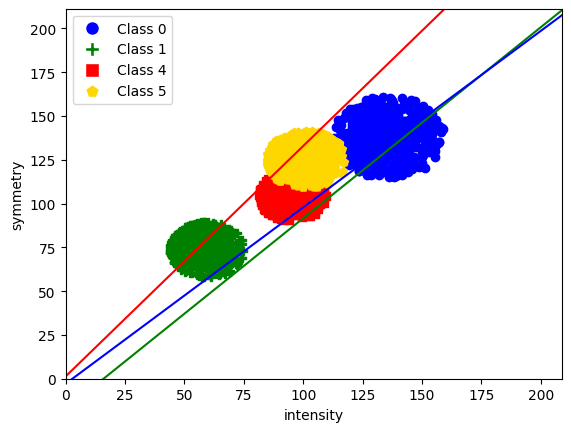

In [45]:
show_mult_model_lines(
    pd.DataFrame(X_train, columns=["bias", "intensity", "symmetry"]),
    pd.DataFrame(Y_train, columns=["label"]), 
    columns=["bias", "intensity", "symmetry", "label"],
    Ws=[w4one, w4zero, w4four],
)